<a href="https://colab.research.google.com/github/JhonnyLimachi/Sigmoidal/blob/main/20_Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Wordcloud

Wordcloud é também um tipo de visualização de dados muito poderosa, principalmente quando estamos trabalhando com textos, documentos, pesquisas, entre outras.

<center><img src="https://theappassembly.com/wp-content/uploads/2016/11/BigDataWordMap-1264x736.jpg" height="400px"></center>

Uma dificuldade que temos é excluir palavras como artigos e pronomes da nossa análise. Uma vez que eles aparecem com frequência, podem tirar o protagonismo de palavras que de fato deveriam aparecer maiores.

Para conseguir desenhar uma wordcloud em Python, temos que instalar a biblioteca `wordcloud` na máquina. Vamos fazer isso e usar o *dataset* completo do Airbnb para o Rio de Janeiro (não aquele resumido, que baixamos no Módulo 1).

## Importando dados do Airbnb

Você pode acessar diretamente no [Portal do Airbnb](http://insideairbnb.com/get-the-data.html) e fazer o download do arquivo. Se você preferir, você pode baixar os dados diretamente [neste link](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-05-24/data/listings.csv.gz).

<center><img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/airbnbprint.png" height="300px"></center>

Este *dataset* é muito maior que a sua versão resumida. Descompactado, tem mais de 100Mb, 35.793 entradas e 106 atributos! Vamos importar ele todo, mas só vou usar a coluna `description`, que contém o resumo que o anfitrião escreveu sobre sua propriedade.

Vamos ver em uma nuvem de palavras quais as palavras mais frequentes que aparecem :)

In [1]:
# instalar wordcloud
!pip install wordcloud -q

In [2]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
DATA_PATH = "http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-04-26/data/listings.csv.gz"

# importar o arquivo csv em um df
df = pd.read_csv(DATA_PATH)

Esse *dataset* é bem mais completo que o primeiro que trabalhamos no Módulo 1. Veja abaixo a quantidade de colunas a mais, que poderiam (inclusive) alimentar um modelo de Machine Learning para calcular o preço do aluguel de um imóvel.

In [4]:
# ver as 5 primeiras entradas
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210426010946,2021-04-30,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,10.0,10.0,9.0,NaN,t,1,1,0,0,1.98
1,24480,https://www.airbnb.com/rooms/24480,20210426010946,2021-04-27,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.66
2,35636,https://www.airbnb.com/rooms/35636,20210426010946,2021-04-30,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,10.0,10.0,9.0,NaN,f,1,1,0,0,1.98
3,35764,https://www.airbnb.com/rooms/35764,20210426010946,2021-04-27,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,10.0,10.0,10.0,NaN,f,1,1,0,0,2.79
4,41198,https://www.airbnb.com/rooms/41198,20210426010946,2021-04-27,"Modern 2bed,Top end of Copacabana","<b>The space</b><br />Stay in this, Modern,cle...",NaN,https://a0.muscache.com/pictures/3576716/2d6a9...,178975,https://www.airbnb.com/users/show/178975,...,9.0,9.0,9.0,NaN,f,2,2,0,0,0.18


Para fazer nossa wordcloud, eu irei eliminar as linhas contendo valores ausente, uma vez que elas não servirão para nada.

In [6]:
# ver a quantidade de valores ausentes
print("Valores ausentes para description: ", df.description.isnull().sum())

# eliminar as colunas com valores ausentes
description = df.dropna(subset=['description'], axis=0)['description']

Valores ausentes para description:  1472


Basicamente, eu apenas eliminei os valores nulos da coluna `description` e atribui a `Series` a outra variável. Para criar a wordcloud, vou concatenar todas as strings, como se fosse uma linha única.

In [7]:
# concatenar as palavras
all_description = " ".join(s for s in description)

print("Quantidade de Palavras: {}".format(len(all_description)))

Quantidade de Palavras: 15694551


Agora sim, vamos para a biblioteca `wordcloud`. A primeira etapa consiste em criar uma lista de stopword, que basicamente são palavras que devem ser removidas da wordcloud, como "a", "não", "mas", "and", "I", "not", etc.

Na sequência, segue o comando para gerar a nuvem, seguindo as orientações da documentação oficial do pacote.

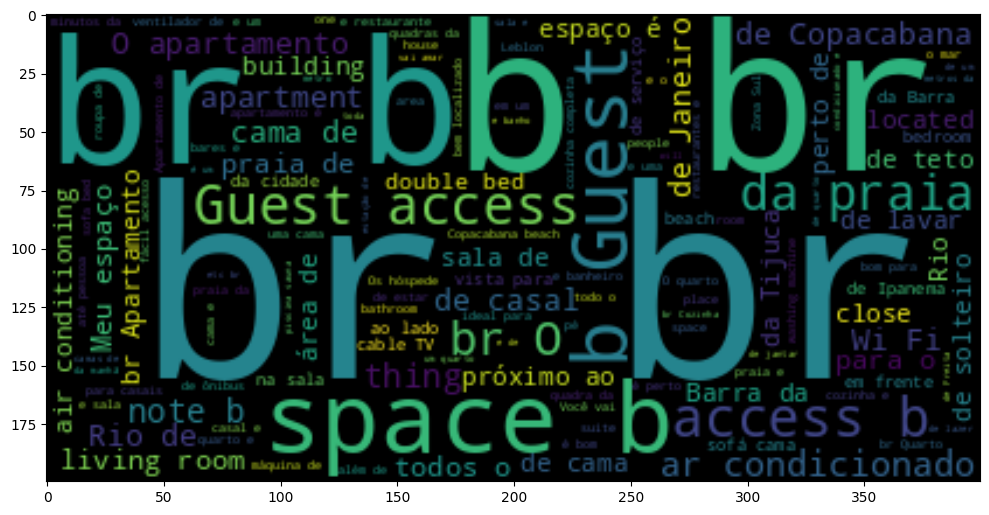

In [8]:
# lista de stopword
stopwords = set(STOPWORDS)

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(all_description)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Veja como algumas palavras como "meu" e "da" estão destacados, porém não acrescentam informação relevante. Podemos melhorar esse *wordcloud* atualizando a nossa lista de stopwords.